## Imports and Loading Datasets

In [2]:
!pip install alibi
!pip install pyale

  Using cached PyALE-1.2.0-py3-none-any.whl.metadata (13 kB)
Using cached PyALE-1.2.0-py3-none-any.whl (26 kB)


In [1]:
# mount drive - to access files from google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%matplotlib inline

# import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import PartialDependenceDisplay
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.inspection import permutation_importance
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from PyALE import ale
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# load  boston housing data - https://scikit-learn.org/1.0/modules/generated/sklearn.datasets.load_boston.html
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
# display completion message - done as an indicator is errors occur
if data is not None:
    print("----- <Boston Housing Dataset Loaded Successfully> -----")

target = raw_df.values[1::2, 2]
# display completion message - done as an indicator is errors occur
if target is not None:
    print("----- <Boston Housing Target Loaded Successfully> -----\n")


# load titanic dataset
titanic_train_df = pd.read_csv("/content/drive/MyDrive/Third Year/ARI3205 - InterpretableAI_Project/Colab Notebooks/titanicDataset/train.csv")
# display completion message - done as an indicator is errors occur
if titanic_train_df is not None:
    print("----- <Titanic Training Dataset Loaded Successfully> -----")

titanic_test_df = pd.read_csv("/content/drive/MyDrive/Third Year/ARI3205 - InterpretableAI_Project/Colab Notebooks/titanicDataset/test.csv")
# display completion message - done as an indicator is errors occur
if titanic_test_df is not None:
    print("----- <Titanic Testing Dataset Loaded Successfully> -----")


----- <Boston Housing Dataset Loaded Successfully> -----
----- <Boston Housing Target Loaded Successfully> -----

----- <Titanic Training Dataset Loaded Successfully> -----
----- <Titanic Testing Dataset Loaded Successfully> -----


## Boston Feed Forward Neural Network

### Handling Data

In [4]:
# ensuring the data is numeric
data_features = data.astype(float)
data_target = target.astype(float)

# splitting the dataset into training and testing sets with an 80/20 split
X_train_boston, X_test_boston, y_train_boston, y_test_boston = train_test_split(data_features, data_target, test_size=0.2, random_state=42)

# standardizing the features
scaler_boston = StandardScaler()
X_train_boston_scaled = scaler_boston.fit_transform(X_train_boston)
X_test_boston_scaled = scaler_boston.transform(X_test_boston)

### Training Model

In [5]:
# define and train MLPRegressor model
mlp_regressor = MLPRegressor(
    hidden_layer_sizes=(64, 32),
    activation='relu',
    solver='adam',
    learning_rate_init=0.001,
    max_iter=500,
    random_state=42
)

# train model
mlp_regressor.fit(X_train_boston_scaled, y_train_boston)

MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)

### Evaluating Model

In [6]:
# get model predictions
predictions_boston = mlp_regressor.predict(X_test_boston_scaled)

# calculate Mean Squared Error and Mean Absolute Error
mse_boston = mean_squared_error(y_test_boston, predictions_boston)
mae_boston = mean_absolute_error(y_test_boston, predictions_boston)

# display
print(f"Boston Housing Mean Squared Error: {round(mse_boston, 4)}")
print(f"Boston Housing Mean Absolute Error: {round(mae_boston, 4)}")

Boston Housing Mean Squared Error: 12.3856
Boston Housing Mean Absolute Error: 2.2701


## Titanic Feed Forward Neural Network

### Handling Data

In [7]:
# Handle missing values
titanic_train_df['Age'].fillna(titanic_train_df['Age'].mean(), inplace=True)
titanic_train_df['Embarked'].fillna(titanic_train_df['Embarked'].mode()[0], inplace=True)

# Drop columns that are not needed for prediction
titanic_train_df.drop(columns=['Name', 'Ticket', 'Cabin', 'PassengerId'], inplace=True)

# Convert categorical columns to numeric using one-hot encoding
titanic_train_df = pd.get_dummies(titanic_train_df, columns=['Sex', 'Embarked'], drop_first=True)

# Separate features and target
X_titanic = titanic_train_df.drop(columns=['Survived'])
y_titanic = titanic_train_df['Survived']

# split the dataset into training and testing sets with 80/20 split
X_train_titanic, X_test_titanic, y_train_titanic, y_test_titanic = train_test_split(X_titanic, y_titanic, test_size=0.2, random_state=42)

# standardizing the features
scaler_titanic = StandardScaler()
X_train_titanic_scaled = scaler_titanic.fit_transform(X_train_titanic)
X_test_titanic_scaled = scaler_titanic.transform(X_test_titanic)

<ipython-input-7-8c38d39d9a4f>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_train_df['Age'].fillna(titanic_train_df['Age'].mean(), inplace=True)
<ipython-input-7-8c38d39d9a4f>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value

### Training Model

In [8]:
# define and train MLPClassifier model
mlp_classifier = MLPClassifier(
    hidden_layer_sizes=(64, 32),
    activation='relu',
    solver='adam',
    learning_rate_init=0.001,
    max_iter=500,
    random_state=42
)

# train model
mlp_classifier.fit(X_train_titanic_scaled, y_train_titanic)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)

### Evaluating Model

In [9]:
# get model predictions
predictions_titanic = mlp_classifier.predict(X_test_titanic_scaled)

# get accuracy score
accuracy_titanic = accuracy_score(y_test_titanic, predictions_titanic)

# display
print(f"Titanic Test Accuracy: {round((accuracy_titanic * 100), 2)}%")

Titanic Test Accuracy: 80.45%


## 1. Partial Dependence Plots (PDP) and Individual Conditional Expectation (ICE) plots


### a and b. Use PDP to examine the average effect of at least two features and Use ICE plots to explore individual predictions for at least two features.

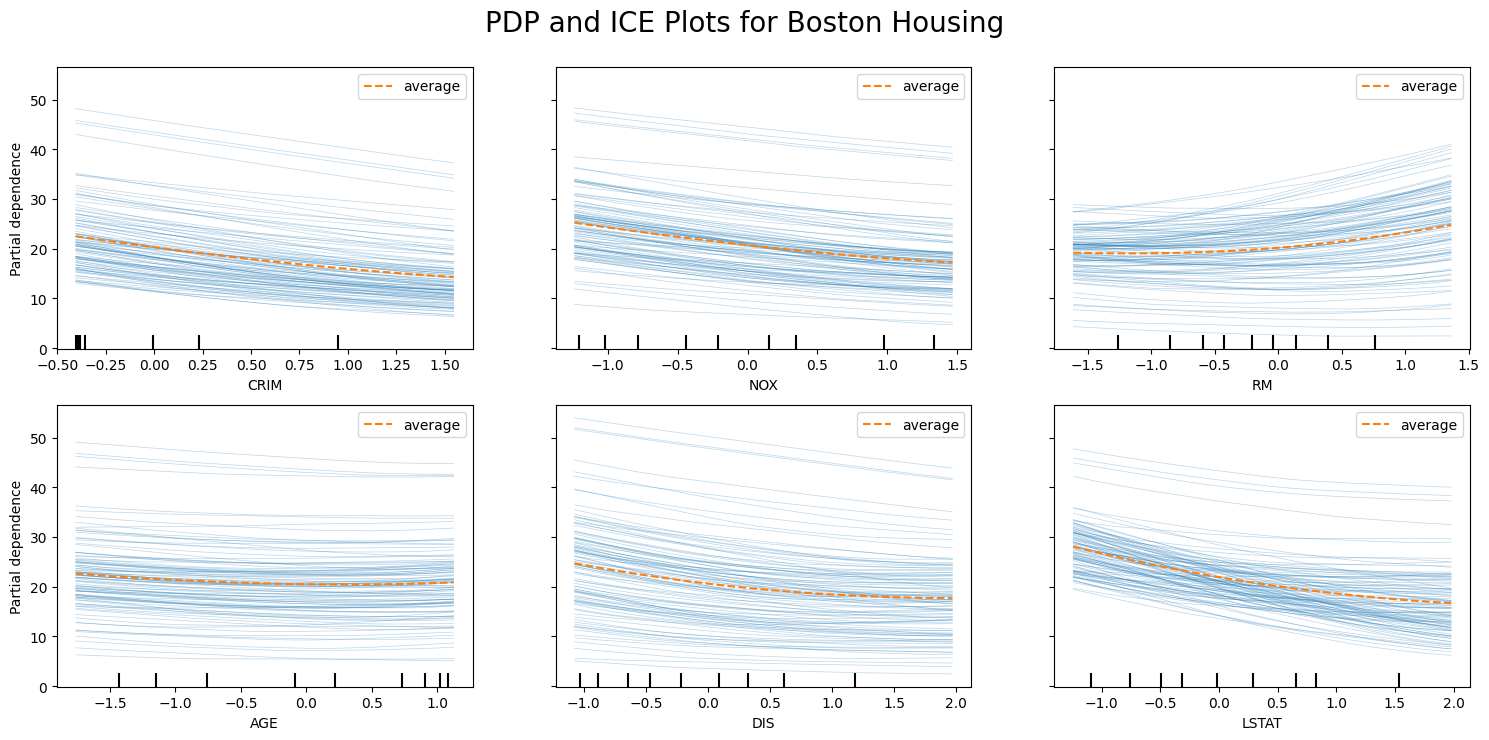

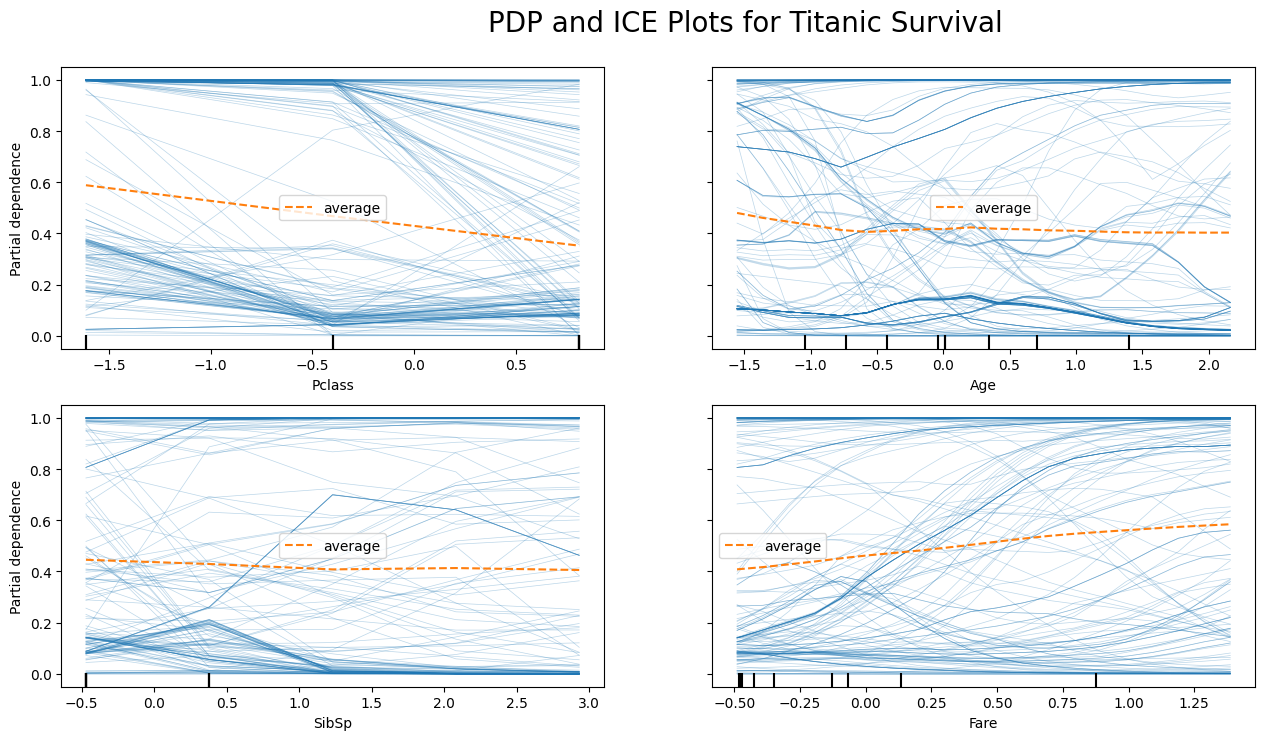

In [12]:
# PDP for Boston Housing
feature_names_boston = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

fig, ax = plt.subplots(figsize=(15, 8))

PartialDependenceDisplay.from_estimator(
    mlp_regressor,
    X_test_boston_scaled,
    features=[0, 4, 5, 6, 7, 12],  # indices for 'CRIM', 'NOX', 'RM', 'AGE', 'DIS', 'LSTAT'
    feature_names=feature_names_boston,
    grid_resolution=20,
    n_cols=3,  # plots in 2 rows of 3 columns for better alignment
    kind='both',  # both PDP and ICE
    ax=ax,
)

plt.suptitle('PDP and ICE Plots for Boston Housing', fontsize=20, y=0.95)  # Main title with adjusted y-position
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # ensures no overlap
plt.show()


print("\n")


# PDP for Titanic
feature_names_titanic = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S']

fig, ax = plt.subplots(figsize=(15, 8))

PartialDependenceDisplay.from_estimator(
    mlp_classifier,
    X_test_titanic_scaled,
    features=[0, 1, 2, 4],  # indices for 'Pclass', 'Age', 'SibSp', 'Fare'
    feature_names=feature_names_titanic,
    grid_resolution=20,
    n_cols=2,  # plots in 2 rows of 2 columns
    kind='both',  # both PDP and ICE
    ax=ax,
)

plt.suptitle('PDP and ICE Plots for Titanic Survival', fontsize=20, y=0.95)  # Adjusted y-position
plt.tight_layout(rect=[0, 0.03, 0.85, 0.95])  # ensures no overlap
plt.show()

### c. Explain what insights PDP and ICE give about the model’s behaviour.

### Boston Housing Dataset (PDP and ICE Plots Interpretation)
**The PDP and ICE plots for the Boston Housing dataset show the global and individual effects of features like CRIM, NOX, RM, AGE, DIS, and LSTAT on predicted housing prices. Features such as CRIM (crime rate) and NOX (nitric oxide concentration) exhibit a clear negative trend in their PDPs, indicating that higher crime rates or pollution levels lower house prices. Conversely, RM (number of rooms) shows a positive trend, reflecting the higher prices associated with larger houses. The ICE lines for CRIM and NOX vary in slope but follow the global downward trend, highlighting consistent sensitivity across individual predictions. For RM, the ICE lines mostly align with the upward PDP trend, suggesting a uniform positive effect across data points. Features like DIS (distance to employment centers) and LSTAT (lower status of the population) also show predominantly negative trends, reinforcing that undesirable socioeconomic factors drive housing prices lower.**

### Titanic Survival Dataset (PDP and ICE Plots Interpretation)
**The PDP and ICE plots for the Titanic dataset examine the effects of features such as Pclass, Age, SibSp, and Fare on survival probability. The PDP for Pclass demonstrates a negative trend, showing that higher passenger classes (e.g., first class) significantly increase survival likelihood, while lower classes reduce it. The ICE lines indicate variability in this effect, with some individual predictions deviating from the average trend. Most probably because of interactions with other features like gender or family size. Age has a weak negative relationship in its PDP, with ICE lines displaying scattered individual behaviors, indicating that age affects survival differently across the dataset. SibSp shows minimal global impact on survival, but the ICE lines suggest individual-level variations, most often for passengers with multiple family members aboard. Fare shows a positive trend, suggesting that higher ticket prices correspond to a higher probability of survival, and the ICE lines largely align with this effect.**

## 2. Permutation Feature Importance (PFI)

### a. Use PFI to identify the most important features in the model.

In [13]:
print("\n----- <Boston PFI> -----")

# permutation Feature Importance for Boston Housing
pfi_result_boston = permutation_importance(mlp_regressor, X_test_boston_scaled, y_test_boston, n_repeats=10, random_state=42)

# display feature importances
for i, feature_name in enumerate(feature_names_boston):
    print(f"{feature_name}: {round(pfi_result_boston.importances_mean[i], 4)}")

print("\n----- <Titanic PFI> -----")

# permutation Feature Importance for Boston Housing
pfi_result_titanic = permutation_importance(mlp_classifier, X_test_titanic_scaled, y_test_titanic, n_repeats=10, random_state=42)

# display feature importances
for i, feature_name in enumerate(feature_names_titanic):
    print(f"{feature_name}: {round(pfi_result_titanic.importances_mean[i], 4)}")


----- <Boston PFI> -----
CRIM: 0.2007
ZN: 0.0281
INDUS: 0.012
CHAS: 0.023
NOX: 0.213
RM: 0.3111
AGE: 0.0245
DIS: 0.1472
RAD: 0.2097
TAX: 0.0802
PTRATIO: 0.0752
B: 0.0196
LSTAT: 0.3912

----- <Titanic PFI> -----
Pclass: 0.0508
Age: 0.0212
SibSp: 0.0067
Parch: 0.0246
Fare: 0.0318
Sex_male: 0.1218
Embarked_Q: 0.0017
Embarked_S: 0.0218


### b. Explain what the term “important” means when using the PFI method.

**When it comes to Permutation Feature Importance (PFI), the term "important" refers to how much a feature affects the model's accuracy. PFI works by shuffling a feature's values and then checking how much the model's performance (like accuracy or error) changes. If the performance drops a lot, it means the feature is important because the model depends on it for predictions. If there’s little or no change what so ever, it means the feature doesn’t really matter for the model’s predictions.**

## 3. Accumulated Local Effects (ALE)

### a. Implement ALE plots to see the local effects of feature changes.

INFO:PyALE._ALE_generic:Continuous feature detected.
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but MLPRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but MLPRegressor was fitted without feature names
  warnings.warn(
INFO:PyALE._ALE_generic:Continuous feature detected.
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but MLPRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but MLPRegressor was fitted without feature names
  warnings.warn(


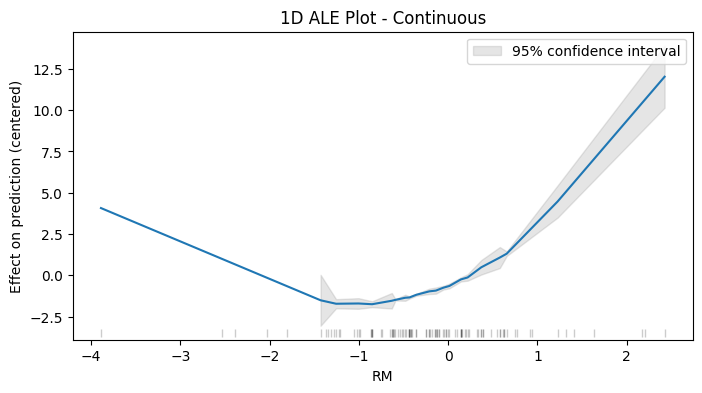

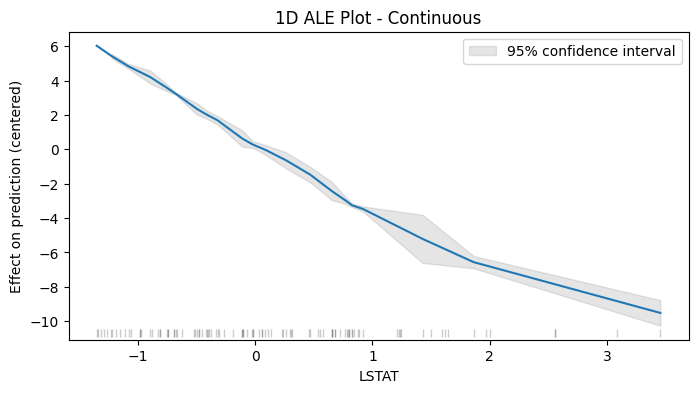

INFO:PyALE._ALE_generic:Continuous feature detected.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
INFO:PyALE._ALE_generic:Continuous feature detected.
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


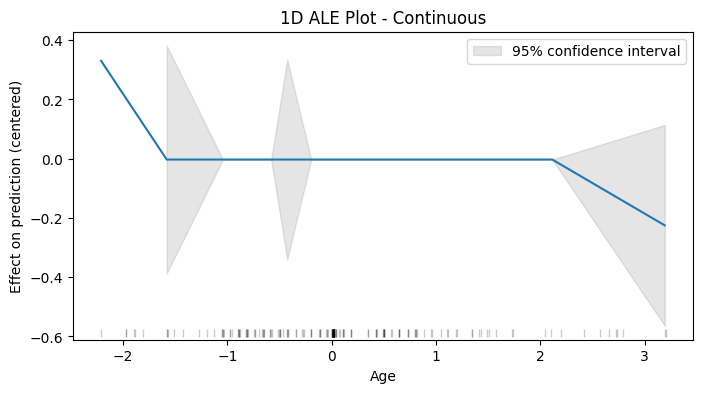

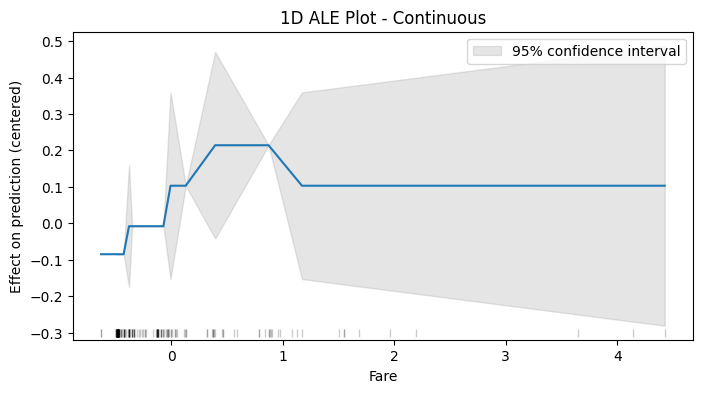

In [14]:
# ALE plot for Boston Housing
ale(X=pd.DataFrame(X_test_boston_scaled, columns=feature_names_boston), model=mlp_regressor, feature=['RM'], grid_size=20)
ale(X=pd.DataFrame(X_test_boston_scaled, columns=feature_names_boston), model=mlp_regressor, feature=['LSTAT'], grid_size=20)

plt.show()

print("\n")

# ALE plot for Titanic dataset
ale(X=pd.DataFrame(X_test_titanic_scaled, columns=feature_names_titanic), model=mlp_classifier, feature=['Age'], grid_size=20)
ale(X=pd.DataFrame(X_test_titanic_scaled, columns=feature_names_titanic), model=mlp_classifier, feature=['Fare'], grid_size=20)

plt.show()

### Compare ALE with PDP and discuss any differences in the interpretability of these techniques.

**The PDP shows the average effect of a feature on model predictions by ignoring other features, assuming they are independent. It is good for giving a global view of the feature's importance and is easy to understand when features are not related to each other. However, it can give incorrect results when features are strongly correlated because it doesn’t consider how they interact.**

**The ALE plot is different because it looks at the local effect of a feature in intervals and accounts for how features depend on each other, making it more accurate for correlated features. ALE also includes confidence intervals, which make it more reliable, but it is generally harder to understand due to it being more complicated.**

## 4. Global Surrogates

### a. Train an interpretable model to approximate the predictions of the feed-forward neural network model.

In [ ]:
# train a Decision Tree to approximate the neural network for Boston Housing
surrogate_model_boston = DecisionTreeRegressor(max_depth=5, random_state=42)
surrogate_model_boston.fit(X_train_boston_scaled, mlp_regressor.predict(X_train_boston_scaled))

# evaluate the surrogate model's effectiveness
r_squared_boston = surrogate_model_boston.score(X_test_boston_scaled, mlp_regressor.predict(X_test_boston_scaled))
print(f"R-squared value for boston surrogate model: {round(r_squared_boston, 4)}")



# train a Decision Tree to approximate the neural network for Boston Housing
surrogate_model_titanic = DecisionTreeClassifier(max_depth=5, random_state=42)
surrogate_model_titanic.fit(X_train_titanic_scaled, mlp_classifier.predict(X_train_titanic_scaled))

# evaluate the surrogate model's effectiveness
r_squared_titanic = surrogate_model_titanic.score(X_train_titanic_scaled, mlp_classifier.predict(X_train_titanic_scaled))
print(f"R-squared value for titanic surrogate model: {round(r_squared_titanic, 4)}")

R-squared value for boston surrogate model: 0.7425
R-squared value for titanic surrogate model: 0.9452


### Analyse the surrogate model's effectiveness and discuss when such approximations are helpful.

**The surrogate model for the Boston Housing dataset has an R-squared value of 0.7425, meaning the Decision Tree could approximate about 74% of the variance in the neural network's predictions. This shows a moderate level of effectiveness, showing that the surrogate model provides a fairly good representation of the neural network. **

**On the other hand, the surrogate model for the Titanic dataset achieved an R-squared value of 0.9452, meaning it captured 95% of the variance in the neural network’s predictions. This suggests that the Decision Tree was highly effective in approximating the neural network for this dataset, likely because the relationships between the features and the target (survival) were simpler and therefore, more easily represented by the Decision Tree.**

**Such approximations are helpful because they make complex models like neural networks easier to understand. This is particularly useful when explaining black-box models to people who may not have a technical background. Additionally, they can also assist in debugging and validating the neural network’s behavior by checking if the predictions align with domain knowledge. In some cases, surrogate models can even replace the original model for deployment when simplicity and interpretability are more important than raw accuracy.**